In [79]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from torch.optim import Adam
import matplotlib.pyplot as plt

In [47]:
SEED = 1234
NUM_SAMPLES = 50
torch.manual_seed(SEED)

In [74]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = y_train.shape[1]
LEARNING_RATE = 1e-1
NUM_EPOCHS = 100

In [49]:
def generate_data(num_samples):
    '''Generate data for linear regression. 
    theto 0 and theta1 being defined here'''
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [50]:
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

df = pd.DataFrame(data, columns=["X","y"])

X = df[["X"]].values
y = df[["y"]].values

[[ 0.          8.80526732]
 [ 1.          3.37295305]
 [ 2.         -0.18986751]
 [ 3.          5.288796  ]
 [ 4.         21.12798415]]


In [51]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size = TRAIN_SIZE)

In [52]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")


train: 35 (0.70)
remaining: 15 (0.30)


In [53]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5)

In [54]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 35 (0.70)
val: 7 (0.14)
test: 8 (0.16)


In [55]:
# Standardize the data (mean = 0 and std = 1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [56]:
X_train = X_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).ravel().reshape(-1, 1)
X_val = X_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).ravel().reshape(-1, 1)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).ravel().reshape(-1, 1)

In [57]:
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: 0.5, std: 0.8
mean: 0.5, std: 0.8


In [60]:
N = 3
x = torch.randn(N, INPUT_DIM)
print(x.shape)
print(x.numpy())

torch.Size([3, 1])
[[ 0.04613046]
 [ 0.40240282]
 [-1.0115291 ]]


In [62]:
m = nn.Linear(INPUT_DIM, OUTPUT_DIM)
print(m)
print (f"weights ({m.weight.shape}): {m.weight[0][0]}")
print (f"bias ({m.bias.shape}): {m.bias[0]}")

Linear(in_features=1, out_features=1, bias=True)
weights (torch.Size([1, 1])): 0.34761226177215576
bias (torch.Size([1])): -0.3370760679244995


In [64]:
'''Forward Pass'''

z = m(x)
print(z.shape)
print(z.detach().numpy())

torch.Size([3, 1])
[[-0.32104054]
 [-0.19719592]
 [-0.68869597]]


In [65]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim) -> None:
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
    def forward(self, x_in):
        y_pred = self.fc1(x_in)
        return y_pred

In [66]:
model = LinearRegression(input_dim=INPUT_DIM, output_dim=OUTPUT_DIM)
print(model.named_parameters)

<bound method Module.named_parameters of LinearRegression(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [69]:
loss_fn = nn.MSELoss()
y_pred = torch.Tensor([0., 0., 1., 1.])
y_true = torch.Tensor([1., 1., 1., 0.])
loss = loss_fn(y_pred, y_true)
print(f"Loss: {loss.numpy():.2f}")

Loss: 0.75


In [72]:
optimizer = Adam(model.parameters(), lr = LEARNING_RATE)

In [73]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)


In [75]:
# Training
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%20==0:
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.22
Epoch: 20 | loss: 0.04
Epoch: 40 | loss: 0.03
Epoch: 60 | loss: 0.03
Epoch: 80 | loss: 0.03


In [76]:
# Predictions
pred_train = model(X_train)
pred_test = model(X_test)

In [77]:
# Performance
train_error = loss_fn(pred_train, y_train)
test_error = loss_fn(pred_test, y_test)
print(f"train_error: {train_error:.2f}")
print(f"test_error: {test_error:.2f}")


train_error: 0.03
test_error: 0.03


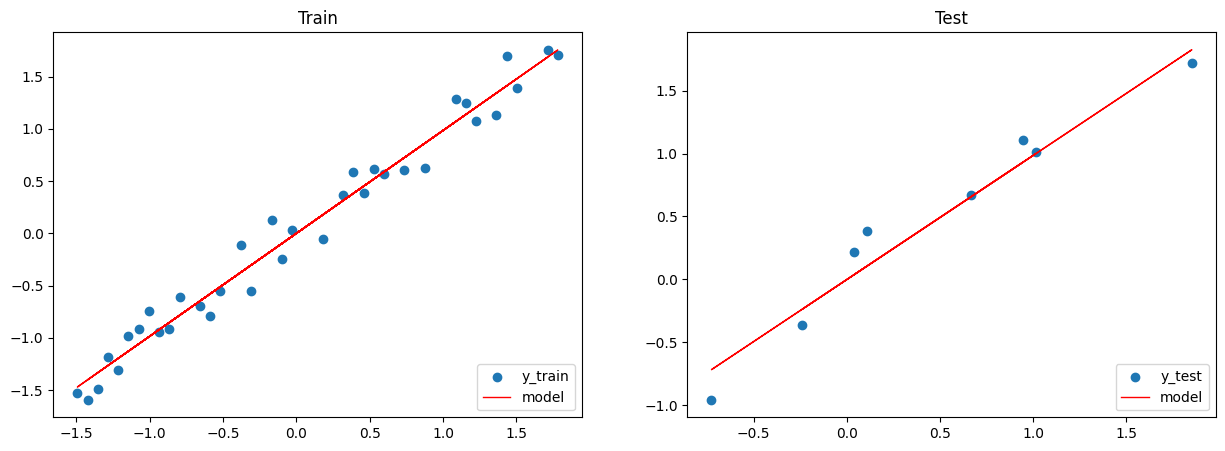

In [80]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test.detach().numpy(), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()


In [81]:
# Feed in your own inputs
sample_indices = [10, 15, 25]
X_infer = np.array(sample_indices, dtype=np.float32)
X_infer = torch.Tensor(X_scaler.transform(X_infer.reshape(-1, 1)))

In [83]:
# Unstandardize predictions
pred_infer = model(X_infer).detach().numpy() * np.sqrt(y_scaler.var_) + y_scaler.mean_
for i, index in enumerate(sample_indices):
    print (f"{df.iloc[index]['y']:.2f} (actual) → {pred_infer[i][0]:.2f} (predicted)")

34.80 (actual) → 38.02 (predicted)
53.50 (actual) → 55.75 (predicted)
79.23 (actual) → 91.19 (predicted)


In [84]:
W = model.fc1.weight.data.numpy()[0][0]
b = model.fc1.bias.data.numpy()[0]
W_unscaled = W * (y_scaler.scale_/X_scaler.scale_)
b_unscaled = b * y_scaler.scale_ + y_scaler.mean_ - np.sum(W_unscaled*X_scaler.mean_)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.5X + 2.6
